# Predict churn of customers using a neural network

## Objective:
Build a model to predict churn for bank customers using neural networks.

## Import libraries

In [22]:
# import required libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler

## Import data
- Import predicting-churn-for-bank-customers data

In [23]:
df=pd.read_csv('/kaggle/input/predicting-churn-for-bank-customers/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Exploratory analysis

In [24]:
#check No of records and columns
df.shape

(10000, 14)

In [25]:
df.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [26]:
df.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

Observation: No null values

In [27]:
df.duplicated().sum()

0

Observation: No duplicate data

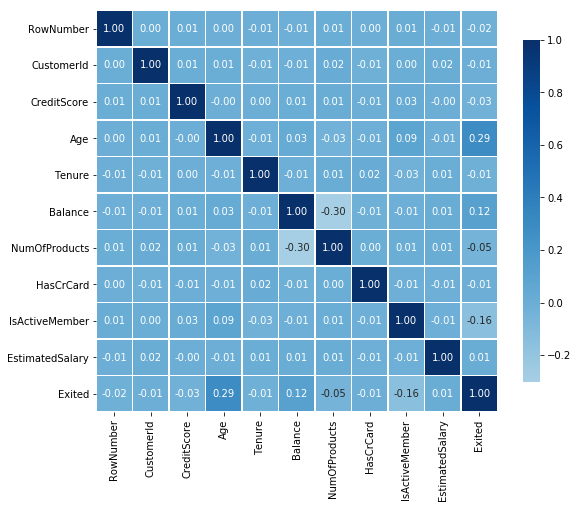

In [28]:
def correlation_heatmap(li):
    correlations = li.corr()

    fig, ax = plt.subplots(figsize=(9,9))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',cmap='Blues',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(df)

## Preprocessing of data

- Remove columns which don’t help the problem statement.

In [29]:
df = df.drop(['RowNumber','CustomerId','Surname'], 1)

- Consider all columns as an independent variable and assign to variable X except the last columnand consider the last column as dependent variable and assign to variable y.

In [30]:
X = df.iloc[:, :-1]
y = df.iloc[:,-1].values

In [31]:
X.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58


In [32]:
y

array([1, 0, 1, ..., 1, 1, 0])

- Encode all the categorical columns into numeric

In [34]:
X['Gender'] = X['Gender'].map({'Female': 1, 'Male': 0})
#one hot encode categorical
cols_to_one_hot_encode=['Geography']
X = pd.get_dummies(X, columns = cols_to_one_hot_encode )

In [35]:
X.head(2)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,1


In [37]:
X.shape

(10000, 12)

- Split the data into train and test dataset

In [12]:
#Split the data into train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

- Do Feature Scaling on Independent variables

In [13]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[ 0.16958176,  1.09168714, -0.46460796, ..., -1.01460667,
        -0.5698444 ,  1.74309049],
       [-2.30455945, -0.91601335,  0.30102557, ..., -1.01460667,
         1.75486502, -0.57369368],
       [-1.19119591,  1.09168714, -0.94312892, ...,  0.98560362,
        -0.5698444 , -0.57369368],
       ...,
       [ 0.9015152 , -0.91601335, -0.36890377, ...,  0.98560362,
        -0.5698444 , -0.57369368],
       [-0.62420521,  1.09168714, -0.08179119, ..., -1.01460667,
        -0.5698444 ,  1.74309049],
       [-0.28401079,  1.09168714,  0.87525072, ..., -1.01460667,
         1.75486502, -0.57369368]])

- Use Keras to make the neural network model and train the dataset on the same.

We have 12 input features and one target variable. 2 Hidden layers. Each hidden layer will have 8 nodes. ReLu will be the activation function for hidden layers. As this is a binary classification problem we will use sigmoid as the activation function.

In [14]:
#build model
model = Sequential()
#First Hidden Layer
model.add(Dense(8, input_dim=12, activation='relu'))
#Second  Hidden Layer
model.add(Dense(8, activation='relu'))
#Output Layer
model.add(Dense(1, activation='sigmoid'))

- Compile the neural network.
As this is a binary classification problem, we use binary_crossentropy to calculate the loss function between the actual output and the predicted output.

In [ ]:
# To optimize our neural network we use Adam. Adam stands for Adaptive moment estimation. 
# Adam is a combination of RMSProp + Momentum.
# Momentum takes the past gradients into account in order to smooth out the gradient descent.
# we use accuracy as the metrics to measure the performance of the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
# fit the keras model on the dataset
# batch size indicates how many samples are used per gradient update
# An epoch is iteration over entire data set
history = model.fit(X_train, y_train, epochs=200, batch_size=64)

Epoch 1/50
8000/8000 [==============================] - 1s 74us/step - loss: 0.6722 - accuracy: 0.6021
Epoch 2/50
8000/8000 [==============================] - 0s 26us/step - loss: 0.5470 - accuracy: 0.7946
Epoch 3/50
8000/8000 [==============================] - 0s 25us/step - loss: 0.4886 - accuracy: 0.8012
Epoch 4/50
8000/8000 [==============================] - 0s 25us/step - loss: 0.4462 - accuracy: 0.8142
Epoch 5/50
8000/8000 [==============================] - 0s 26us/step - loss: 0.4249 - accuracy: 0.8236
Epoch 6/50
8000/8000 [==============================] - 0s 26us/step - loss: 0.4150 - accuracy: 0.8251
Epoch 7/50
8000/8000 [==============================] - 0s 27us/step - loss: 0.4073 - accuracy: 0.8270
Epoch 8/50
8000/8000 [==============================] - 0s 26us/step - loss: 0.3991 - accuracy: 0.8307
Epoch 9/50
8000/8000 [==============================] - 0s 27us/step - loss: 0.3898 - accuracy: 0.8370
Epoch 10/50
8000/8000 [==============================] - 0s 29us/step - l

In [16]:
results = model.evaluate(X_test, y_test, batch_size=64)

2000/2000 [==============================] - 0s 28us/step


In [17]:
print('test loss, test acc:', results)

test loss, test acc: [0.3367504736185074, 0.8615000247955322]


In [18]:
# We now predict the output for our test dataset. 
# If the prediction is greater than 0.5 then the output is 1 else the output is 0
y_pred = model.predict(X_test)
y_pred =(y_pred>0.5)

- Compute the accuracy and confusion matrix.

In [19]:
from sklearn.metrics import accuracy_score
a = accuracy_score(y_pred,y_test)
print('Accuracy is:', a*100)

Accuracy is: 86.15


In [20]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred) 
print(conf_mat)

[[1525   70]
 [ 207  198]]


In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1595
           1       0.74      0.49      0.59       405

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000

